## Data visualization from global scale.

In [10]:
import sys
sys.path.append("/Users/luo/OneDrive/SAR-Altimetry/sentinel3-altimetry-l2/utils")
import matplotlib.pyplot as plt
import xarray as xr
from osgeo import gdal
from coor_convert import geo2imagexy
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [11]:
root_dir = '/Users/luo/OneDrive/SAR-Altimetry/sentinel3-altimetry-l2'
## s3 data
path_s3al2_260 = root_dir+'/data/s3a-relative-orbit-260/S3A_SR_2_WAT____20190121T021825_20190121T030242_20191218T104655_2657_040_260______MR1_R_NT_004.SEN3/enhanced_measurement.nc'
path_s3al2_309 = root_dir+'/data/s3a-relative-orbit-309/S3A_SR_2_WAT____20190124T133954_20190124T142746_20191218T110840_2872_040_309______MR1_R_NT_004.SEN3/enhanced_measurement.nc'
path_s3bl2_260 = root_dir+'/data/s3b-relative-orbit-260/S3B_SR_2_WAT____20190104T022002_20190104T030421_20191224T215916_2659_020_260______MR1_R_NT_004.SEN3/enhanced_measurement.nc'
path_s3bl2_309 = root_dir+'/data/s3b-relative-orbit-309/S3B_SR_2_WAT____20200507T134141_20200507T142931_20200602T060821_2869_038_309______MAR_O_NT_004.SEN3/enhanced_measurement.nc'
## tgauge data
path_tguage_obser = root_dir+'/data/tgauge_data/observatory_hk/tgauge_obser.nc'

## parameter
land_resolution = '50m'


In [12]:
## 1. s3l2 altimetry data
s3al2_260 = xr.open_dataset(path_s3al2_260)
s3al2_309 = xr.open_dataset(path_s3al2_309)
s3bl2_260 = xr.open_dataset(path_s3bl2_260)
s3bl2_309 = xr.open_dataset(path_s3bl2_309)
## 2. tgauge data
tguage_obser = xr.open_dataset(path_tguage_obser)


<xarray.DataArray 'ssha_01_ku' ()>
array(-5.045, dtype=float32)

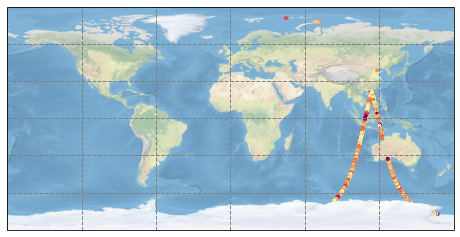

In [39]:
proj = ccrs.PlateCarree(central_longitude=0.0)
extent = [110, 120, 15, 30]
s3l2_data = [s3al2_260, s3al2_309, s3bl2_260, s3bl2_309]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=proj)
ax.stock_img()
for s3l2 in s3l2_data:
    ax.scatter(s3l2['lon_01'], s3l2['lat_01'], c=s3l2['ssha_01_ku'], cmap='Spectral_r', marker='.', edgecolors=None, linewidth=0.0, vmin=-0.5, vmax=0.3)
ax.gridlines(linewidth=1, color='gray', linestyle='--')
# ax.set_extent(extent, crs=proj)
